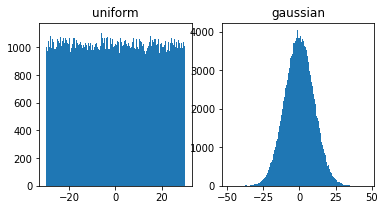

In [1]:
#1 Generate random image (MxN) noise
import numpy as np
import cv2
import math 
import matplotlib.pyplot as plt

img = cv2.imread('Image/lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def GaussianNoiseImage(M,N):
    noise_img = np.random.normal(0, 10, (M,N))  # mean, std, shape
    return noise_img

def uniformNoiseImage(M,N):
    noise_img = np.random.uniform(-30,30,size=(M,N))
    return noise_img

noise_0 = uniformNoiseImage(512,512)
noise_1 = GaussianNoiseImage(512,512)
noise_img_0 = (img + noise_0).astype('uint8')
noise_img_1 = (img + noise_1).astype('uint8')

cv2.imshow('original', img)
cv2.imshow('uniform', noise_0)
cv2.imshow('gaussian', noise_1)
cv2.imshow('uniform+Img', noise_img_0)
cv2.imshow('gaussian+Img', noise_img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(noise_0.ravel(), bins=256)
plt.title('uniform')
plt.subplot(1,2,2)
plt.hist(noise_1.ravel(), bins=256)
plt.title('gaussian')
plt.show()

imshow(winname, mat) -> None

. The function may scale the image, depending on its depth:

. - If the image is 8-bit unsigned, it is displayed as is.

. - If the image is 16-bit unsigned or 32-bit integer, the pixels are divided by 256. 

    That is, the value range [0,255\*256] is mapped to [0,255].
    
. - If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the

.   value range [0,1] is mapped to [0,255].


In [2]:
#2. Compute MSE and PSNR. 

def MSE(img1, img2):
    mse = ((img1-img2)**2).mean()
    return mse

def PNSR(img1, img2):
    mse = MSE(img1,img2)
    pnsr = 10*math.log10(255**2 / mse )
    return pnsr 

gaussian_mse = MSE(img, noise_img_1)
gaussian_pnsr = PNSR(img, noise_img_1)
print('gaussian_mse: ', gaussian_mse)
print('gaussian_pnsr: ', gaussian_pnsr)

uniform_mse = MSE(img, noise_img_0)
uniform_pnsr = PNSR(img, noise_img_0)
print('uniform_mse: ',uniform_mse)
print('uniform_pnsr: ',uniform_pnsr)

gaussian_mse:  60.776519775390625
gaussian_pnsr:  30.293445332651086
uniform_mse:  91.22225189208984
uniform_pnsr:  28.529795719343


In [3]:
# 3. Design KxK Box and Gaussian filter kernel generation function. 

def BoxFilter(size):
    filter = np.ones((size,size))
    filter = filter / filter.size
    return filter

def gaussianFilter(size, std):
    filter = np.ones((size,size))
    filterOffset = size // 2
    for i in range(size):
        for j in range(size):
            filter[i][j] = math.exp( -1 * ( (i-filterOffset)**2 + (j-filterOffset)**2 ) / (2*(std**2)) )
    return filter / filter.sum()
    
box = BoxFilter(3)
gaussian3_3 = gaussianFilter(3, 3)
gaussian5_3 = gaussianFilter(5, 3)

In [ ]:
# 4. Design zero and mirror padding methods. 

#def zeroPadding(img, p):
#    return np.pad(img, ((p,p),(p,p)), 'constant', constant_values=0)

def mirrorPadding(img, p ):
    return np.pad(img, ((p,p),(p,p)), 'symmetric')

def zeroPadding(img, p):
    h, w = img.shape
    padded = np.zeros((h+p*2,w+p*2))
    padded[p:h+p,p:w+p] = img.copy()
    return padded.astype('uint8')

zeroP = zeroPadding(img, 20)  
mirrorP = mirrorPadding(img, 20)
cv2.imshow('uniform+Img', zeroP)
cv2.imshow('gaussian+Img', mirrorP)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 5. Design image filtering. 
def filtering(img, filter):
    h, w = img.shape
    filterSize = len(filter)
    padding = (filterSize-1) // 2
    img = mirrorPadding(img, padding)
    filteredImg = np.zeros((h,w))
    
    for i in range(padding,h+padding):
        for j in range(padding,w+padding):
            product = np.multiply( img[i-padding:i+padding+1,j-padding:j+padding+1], filter )
            filteredImg[i-padding][j-padding] = product.sum()
    return filteredImg.astype('uint8')

In [8]:
filtered_img3_3   = filtering(noise_img_1, gaussian3_3)
filtered_img5_3   = filtering(noise_img_1, gaussian5_3)
cv2.imshow('noise image', noise_img_1)
cv2.imshow('FilteredGaussian FilterSize: 3, std: 3', filtered_img3_3)
cv2.imshow('FilteredGaussian FilterSize: 5, std: 3', filtered_img5_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
gaussian_mse = MSE(img, filtered_img3_3)
gaussian_pnsr = PNSR(img, filtered_img3_3)
print('gaussian_mse (FilterSize: 3, std: 3) : ', gaussian_mse)
print('gaussian_pnsr (FilterSize: 3, std: 3): ', gaussian_pnsr)

gaussian_mse = MSE(img, filtered_img5_3)
gaussian_pnsr = PNSR(img, filtered_img5_3)
print('gaussian_mse (FilterSize: 5, std: 3): ', gaussian_mse)
print('gaussian_pnsr (FilterSize: 5, std: 3): ', gaussian_pnsr)

gaussian_mse (FilterSize: 3, std: 3) :  27.363819122314453
gaussian_pnsr (FilterSize: 3, std: 3):  33.75903649837528
gaussian_mse (FilterSize: 5, std: 3):  29.83753204345703
gaussian_pnsr (FilterSize: 5, std: 3):  33.383174624504484
